In [180]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [181]:
df_crime = pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.csv')

In [182]:
df_crime_rev = df_crime[['City', 'Population', 'Violent\ncrime', 'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Arson3']]

In [183]:
df_crime_rev.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Arson3
0,Adams Village,"1,861",0,0.0,NaN,0,0,12,2,10,0.0
1,Addison Town and Village,"2,577",3,0.0,NaN,0,3,24,3,20,0.0
2,Akron Village,"2,846",3,0.0,NaN,0,3,16,1,15,0.0
3,Albany,"97,956",791,8.0,NaN,227,526,"4,090",705,"3,243",NaN
4,Albion Village,"6,388",23,0.0,NaN,4,16,223,53,165,NaN


In [184]:
df_crime_rev.describe()

,Murder and nonnegligent manslaughter,Rape (revised definition)1,Arson3
count,348.000000,0.0,187.000000
mean,1.566092,NaN,1.871658
std,18.303673,NaN,10.693411
min,0.000000,NaN,0.000000
25%,0.000000,NaN,0.000000
50%,0.000000,NaN,0.000000
75%,0.000000,NaN,1.000000
max,335.000000,NaN,132.000000


In [185]:
df_crime_rev = df_crime_rev.dropna(axis=0,subset=['Property\ncrime'])

In [186]:
df_crime_rev.Population = df_crime_rev.Population.str.replace(',', '').astype(float)
df_crime_rev.Robbery = df_crime_rev.Robbery.str.replace(',', '').astype(float)
df_crime_rev['Violent\ncrime'] = df_crime_rev['Violent\ncrime'].str.replace(',', '').astype(float)
df_crime_rev['Aggravated\nassault'] = df_crime_rev['Aggravated\nassault'].str.replace(',', '').astype(float)
df_crime_rev['Burglary'] = df_crime_rev['Burglary'].str.replace(',', '').astype(float)
df_crime_rev['Larceny-\ntheft'] = df_crime_rev['Larceny-\ntheft'].str.replace(',', '').astype(float)
df_crime_rev['Property\ncrime'] = df_crime_rev['Property\ncrime'].str.replace(',', '').astype(float)

In [187]:
df_crime_rev.dtypes

City                                       object
Population                                float64
Violent\ncrime                            float64
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1              float64
Robbery                                   float64
Aggravated\nassault                       float64
Property\ncrime                           float64
Burglary                                  float64
Larceny-\ntheft                           float64
Arson3                                    float64
dtype: object

In [188]:
for column in df_crime_rev.columns[2:]:
    df_crime_rev[column + ' per cap'] = df_crime_rev[column] / df_crime_rev.Population

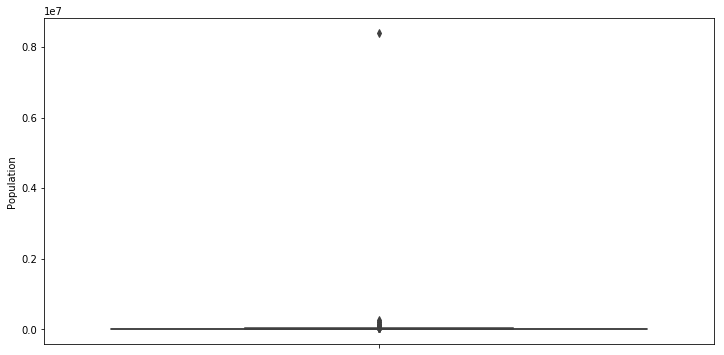

In [189]:
plt.figure(figsize=(12,6))
sns.boxplot(y=df_crime_rev.Population)
plt.show()

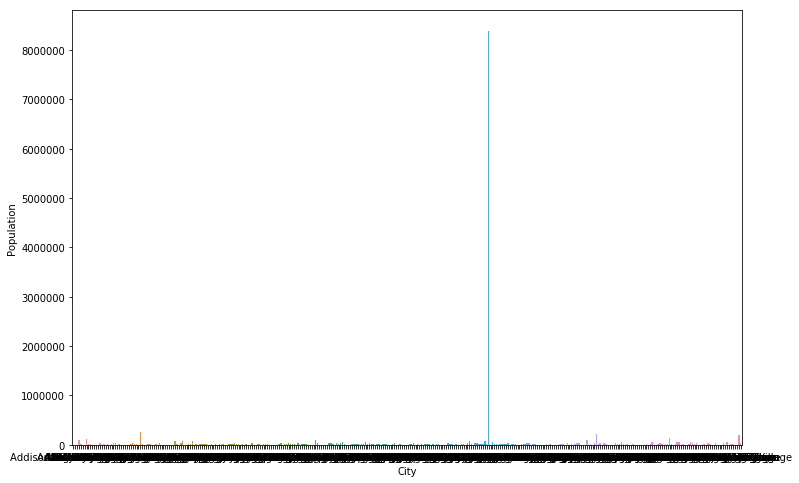

In [190]:
plt.figure(figsize=(12,8))
sns.barplot(x='City', y='Population', data = df_crime_rev)
plt.show()

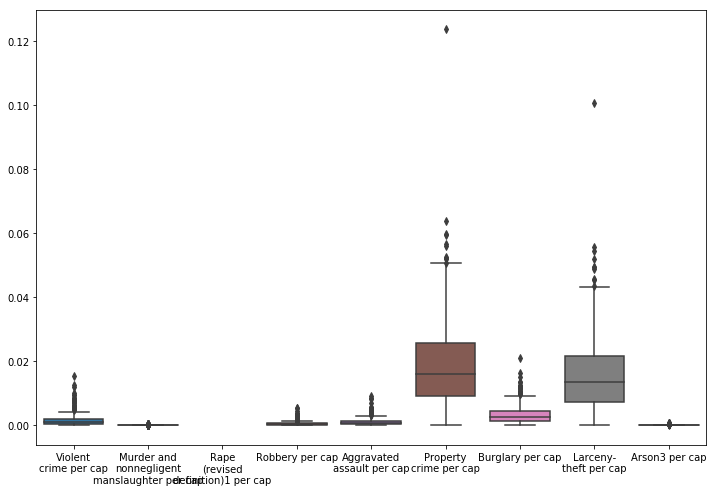

In [191]:
plt.figure(figsize=(12,8))
sns.boxplot(data = df_crime_rev[['Violent\ncrime per cap',
       'Murder and\nnonnegligent\nmanslaughter per cap', 'Rape\n(revised\ndefinition)1 per cap', 
       'Robbery per cap','Aggravated\nassault per cap', 'Property\ncrime per cap',
       'Burglary per cap', 'Larceny-\ntheft per cap', 'Arson3 per cap']])
plt.show()

### Create features for model

In [192]:
df_crime_rev['Population^2'] = df_crime_rev['Population'] ** 2

In [193]:
df_crime_rev['Murder'] = np.where(df_crime_rev['Murder and\nnonnegligent\nmanslaughter'] == 0, 0, 1)
df_crime_rev['Robbery_feat'] = np.where(df_crime_rev['Robbery'] == 0, 0, 1)

In [194]:
df_crime_rev.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,...,Rape (revised definition)1 per cap,Robbery per cap,Aggravated assault per cap,Property crime per cap,Burglary per cap,Larceny- theft per cap,Arson3 per cap,Population^2,Murder,Robbery_feat
0,Adams Village,1861.0,0.0,0.0,NaN,0.0,0.0,12.0,2.0,10.0,...,NaN,0.000000,0.000000,0.006448,0.001075,0.005373,0.0,3.463321e+06,0,0
1,Addison Town and Village,2577.0,3.0,0.0,NaN,0.0,3.0,24.0,3.0,20.0,...,NaN,0.000000,0.001164,0.009313,0.001164,0.007761,0.0,6.640929e+06,0,0
2,Akron Village,2846.0,3.0,0.0,NaN,0.0,3.0,16.0,1.0,15.0,...,NaN,0.000000,0.001054,0.005622,0.000351,0.005271,0.0,8.099716e+06,0,0
3,Albany,97956.0,791.0,8.0,NaN,227.0,526.0,4090.0,705.0,3243.0,...,NaN,0.002317,0.005370,0.041753,0.007197,0.033107,NaN,9.595378e+09,1,1
4,Albion Village,6388.0,23.0,0.0,NaN,4.0,16.0,223.0,53.0,165.0,...,NaN,0.000626,0.002505,0.034909,0.008297,0.025830,NaN,4.080654e+07,0,1


In [198]:
x = df_crime_rev[['Population', 'Murder', 'Violent\ncrime per cap', 'Robbery per cap',
       'Aggravated\nassault per cap', 'Burglary per cap', 'Larceny-\ntheft per cap']]
y = df_crime_rev['Property\ncrime']

In [199]:
regr = linear_model.LinearRegression()

regr.fit(x, y)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('R-squared: \n', regr.score(x, y))

Coefficients: 
 [ 1.68106442e-02 -1.14470335e+01  1.44909588e+05  4.17455033e+05
 -1.81727887e+05  2.84017401e+04  3.50999867e+03]
Intercept: 
 -215.33379020538814
R-squared: 
 0.9959583940002106


In [200]:
print(regr.fit(x, y))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
